## 1. Анализ качества вин

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline

### Загружаем датасеты

In [2]:
train = pd.read_csv('train.csv', sep=',')

### Выводим head нашего датасета

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5
1,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.8,7
2,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,6
3,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3,4
4,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5


### Смотрим размерность датасета

In [4]:
print('Размер датасета: ', train.shape)

Размер датасета:  (1199, 12)


### Проверяем info()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1199 non-null   float64
 1   volatile_acidity      1199 non-null   float64
 2   citric_acid           1199 non-null   float64
 3   residual_sugar        1199 non-null   float64
 4   chlorides             1199 non-null   float64
 5   free_sulfur_dioxide   1199 non-null   float64
 6   total_sulfur_dioxide  1199 non-null   float64
 7   density               1199 non-null   float64
 8   pH                    1199 non-null   float64
 9   sulphates             1199 non-null   float64
 10  alcohol               1199 non-null   float64
 11  quality               1199 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.5 KB


### Проверяем на нулевые значения

In [6]:
train.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 2. Строим модель машинного обучения

In [7]:
train.quality = np.where(train.iloc[:,-1].values >= 7, 1, 0)

In [8]:
X = train.drop(columns=['quality'])
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5
1,8.8,0.310,0.40,2.8,0.109,7.0,16.0,0.99614,3.31,0.79,11.8
2,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5
3,10.1,0.935,0.22,3.4,0.105,11.0,86.0,1.00100,3.43,0.64,11.3
4,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4


In [9]:
y = train['quality'].values
y[0:5]

array([0, 1, 0, 0, 0])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)
knn.predict(X_test)[0:5]

array([0, 0, 0, 0, 0])

In [12]:
print('Процент предикшена: ', knn.score(X_test, y_test))

Процент предикшена:  0.8666666666666667


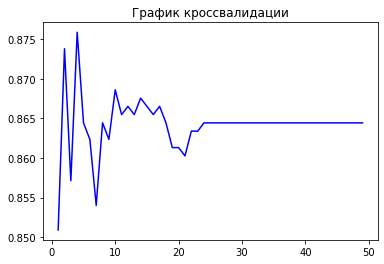

In [13]:
split = KFold(n_splits=8)

ax = []
ay = []
for i in range (1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    cross = cross_val_score(knn, X_train, y_train, cv=split)
    ax.append(i)
    ay.append(np.mean(cross))

plt.plot(ax, ay, color='b')
plt.title("График кроссвалидации")
plt.show()

### Осуществляем гипертюнинг при помощи GridSearchCV

In [14]:
knn_cv = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print('CV_Scores: ', cv_scores)
print('\nСреднее значение перекрестной проверки: {}'.format(np.mean(cv_scores)))

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print('\nСловарь с параметрами для лучшего решения:\n ', knn_gscv.best_params_)
print('\nНаилучший процент предикшена: ', knn_gscv.best_score_)

print("Настройки лучшей модели в контейнере:\n{}\n".format(knn_gscv.best_estimator_))

CV_Scores:  [0.859375   0.875      0.86458333 0.86979167 0.86387435]

Среднее значение перекрестной проверки: 0.8665248691099476

Словарь с параметрами для лучшего решения:
  {'n_neighbors': 4}

Наилучший процент предикшена:  0.8779886561954624
Настройки лучшей модели в контейнере:
KNeighborsClassifier(n_neighbors=4)



In [15]:
pipeline_final = make_pipeline(Normalizer(), KNeighborsClassifier(n_neighbors=4, weights='distance'))
pipeline_final.fit(X, y)

test_df = pd.read_csv("test.csv")
y_predict = pipeline_final.predict(test_df)